# 1-2-3 Map puzzle

El objetivo de este puzzle es encontrar el camino desde el punto de inicio hasta la meta de un mapa moviendote 1 posición, luego 2 y luego 3, luego 1 y asi sucesivamente. Estas son las reglas:
1. Solo puedes hacer saltos en linea recta
2. En los saltos no puedes pasar por paredes
3. Tienes que caer en la meta, no puedes solo pasar por ella

Se uso un algoritmo de busqueda de anchura para poder encontrar la solución al problema.

In [30]:
puzzle = [[1,0,0,0,0,0],
          [1,1,1,1,1,1],
          [1,0,1,0,0,1],
          [1,0,1,1,1,1],
          [1,0,1,0,0,1],
          [1,0,0,0,0,"F"],
          [1,0,0,0,0,1],
          [1,1,1,1,1,1]]

In [87]:
import time

def time_it(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Tiempo de ejecución de {func.__name__}: {end_time - start_time} segundos")
        return result
    return wrapper

In [11]:
def next_jump(current_jump):
    return current_jump + 1 if current_jump != 3 else 1

In [76]:
class Node:
    father = None
    def __init__(self, row, col, jump):
        self.row = row
        self.col = col
        self.jump = jump
        
    def check_jumps(self, puzzle):
        possible_moves = []
        for i in [-1, 1]:
            vertical_jump = self.row + i*self.jump
            horizontal_jump = self.col + i*self.jump
            
            if vertical_jump > 0 and vertical_jump < len(puzzle):
                steps = [puzzle[j][self.col] for j in range(self.row,vertical_jump + i,i)]
                if not 0 in steps:
                    possible_moves.append(Node(vertical_jump, self.col, next_jump(self.jump)))
                                      
            if horizontal_jump > 0 and horizontal_jump < len(puzzle[self.row]):
                steps = puzzle[self.row][self.col:horizontal_jump + i: i]
                if not 0 in steps:
                    possible_moves.append(Node(self.row, horizontal_jump, next_jump(self.jump)))
        
        return possible_moves
                                      
    def evaluate_state(self, puzzle):
        return puzzle[self.row][self.col] == "F"

In [18]:
def get_state(node):
    return (node.row, node.col, node.jump)

In [88]:
@time_it
def algoritmo_de_anchura(puzzle, start_point):
    root_node = Node(start_point[0], start_point[1], 1)
    if root_node.evaluate_state(puzzle):
        return root_node
    fifo = [root_node]
    fifo_state_list = [get_state(root_node)]
    explored_states = []
    answer = "No se encontro ninguna respuesta"
    while len(fifo) > 0:
        node = fifo.pop(0)
        explored_states.append(get_state(node))
        for new_node in node.check_jumps(puzzle):
            new_node.father = node
            if get_state(new_node) not in explored_states and get_state(new_node) not in fifo_state_list:
                if new_node.evaluate_state(puzzle):
                    return new_node
                else:
                    fifo.append(new_node)
                    fifo_state_list.append(get_state(new_node))
    return answer

In [91]:
answer = algoritmo_de_anchura(puzzle, (0,0))
if answer is str:
    print(answer)
else:
    print("Se ha encontrado una solución")

Tiempo de ejecución de algoritmo_de_anchura: 0.0 segundos
Se ha encontrado una solución


In [64]:
import matplotlib.pyplot as plt
from copy import deepcopy

In [82]:
def get_positions(answer):
    node = deepcopy(answer)
    positions = []
    while not node is None:
        positions.append((node.col, node.row))
        node = node.father
    return positions[::-1]
    

In [83]:
def print_map_solution(answer, puzzle_map):
    goal = None
    for i,r in enumerate(puzzle_map):
        for j,c in enumerate(r):
            if c == "F":
                goal = (i, j)
                break
    map_print = deepcopy(puzzle_map)
    map_print[goal[0]][goal[1]] = 1
    
    positions = get_positions(answer)
    
    for pos in positions:
        fig, ax = plt.subplots()
        ax.imshow(map_print)
        
        goal_circle = plt.Circle((circle_position[1], circle_position[0]), 0.3, color='green', fill=True)
        step_circle = plt.Circle(pos, 0.3, color='red', fill=False)
        ax.add_artist(goal_circle)
        ax.add_artist(step_circle)
        plt.show()
        
    
    

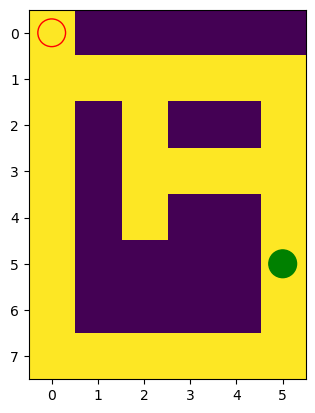

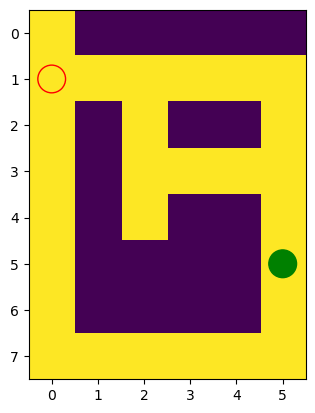

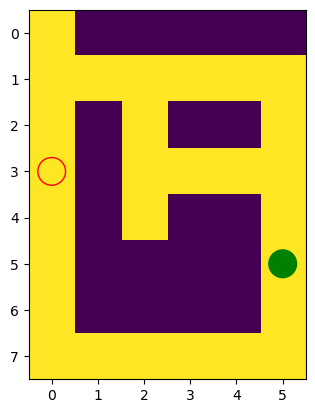

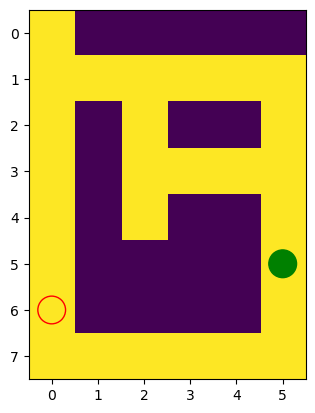

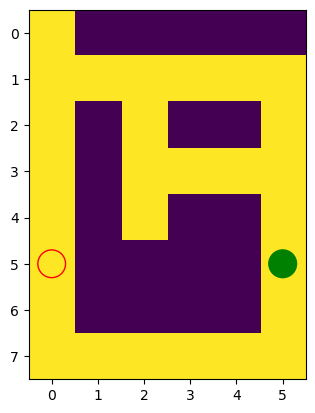

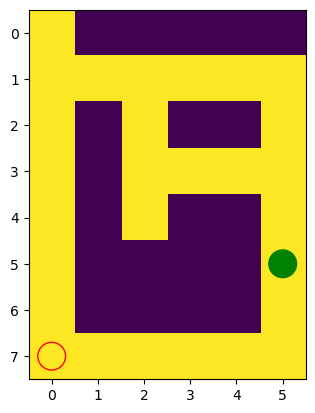

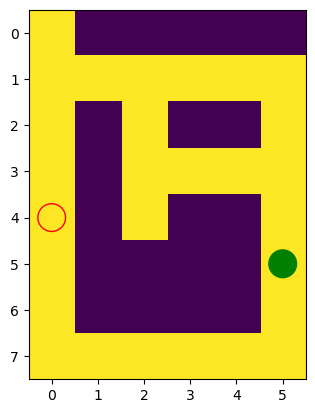

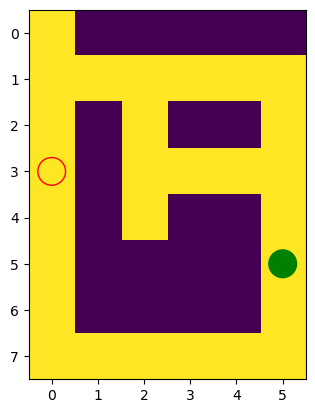

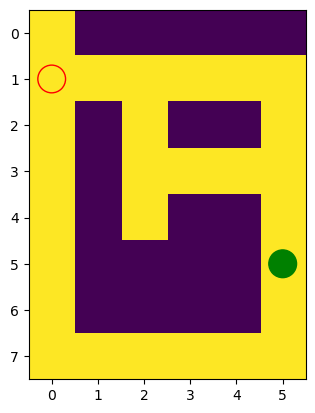

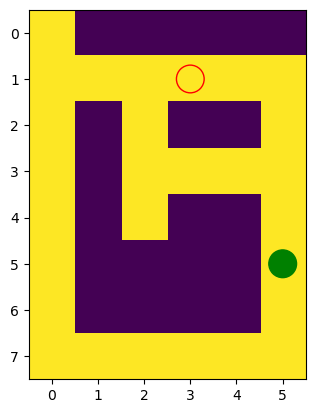

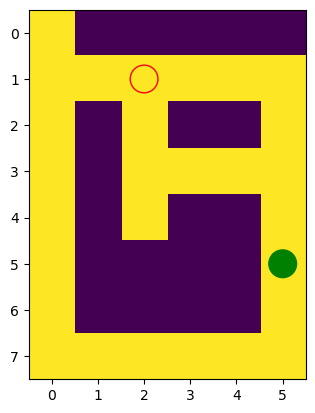

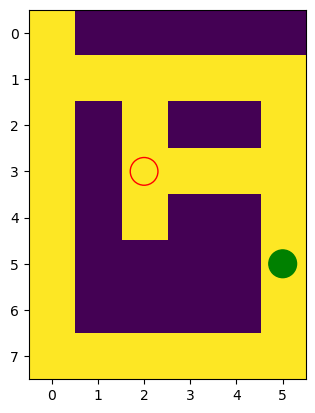

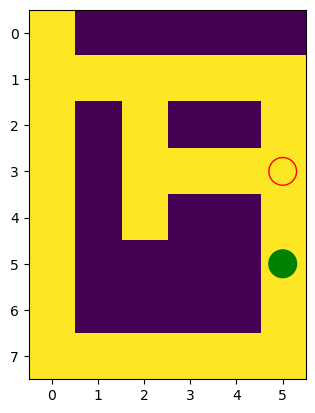

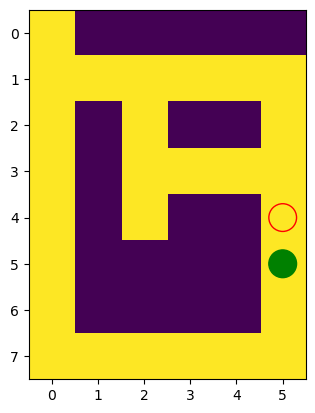

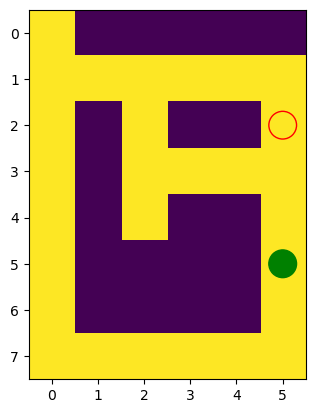

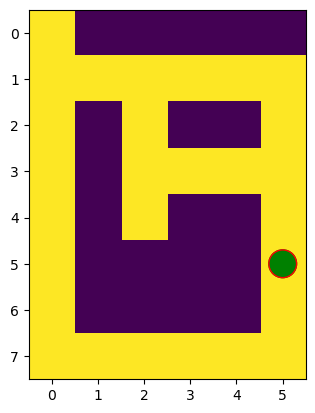

In [92]:
print_map_solution(answer, puzzle)